# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
- 3. [Exercises](#toc3_)
	- 3.1 [Question 1 - Edgeworth Box](#toc3_1_) 
	- 3.2 [Question 2 - Market Clearing Error](#toc3_2_)
	- 3.3 [Question 3 - Market clearing price](#toc3_3_)
	- 3.4a [Question 4a - Allocation when p1 is in P1](#toc3_4_)
	- 3.4b [Question 4b - Allocation when p1 > 0](#toc3_5_)
	- 3.5a [Question 5a - allocation if choice set is in C](#toc3_6_)
	- 3.5b [Question 5b - Question 5b - allocation if no further restrictions](#toc3_7_)
	- 3.6a [Question 6a - Social planner](#toc3_8_)
	- 3.6b [Question 6b - Illustration of allocations](#toc3_9_)
	- 3.7 [Question 7 - Random set of 50 elements](#toc3_10_)
	- 3.8 [Question 8 - Edgeworth box for the 50 elements](#toc3_11_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc2_'></a>[Imports](#toc0_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize_scalar
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

## 2. <a id='toc2_'></a>[Model class](#toc0_)

We import the functions from the inauguralproject.py file.

In [2]:
from inauguralproject import InauguralProjectClass

## 3. <a id='toc3_'></a>[Exercises](#toc0_)

We name the class *model* and *par* to make it easier implementing it into the subsequent coding

In [3]:
model = InauguralProjectClass()
par = model.par

### 3.1. <a id='toc3_1_'></a>[Question 1 - Edgeworth Box](#toc0_)

We want to illustrate the given set in an edgeworth box. To do that we have created code in our py-file. The relevant functions are *find_indifference_curve* and *plot_edgeworth_box*. We can then directly call the functions and illustrate what we want. The used method can be described as:
1. We calculate the indifference curve for each consumer from the initial given endowment set. It is done by using a root-finding loop that for each quantity of good 2 calculates the corresponding quantity of good 1 giving the same level of utility as in the initial endowment point
2. The indifference curves are plotted. We invert the consumer B's curve because it is an edgeworth box.
3. The cigar shaped area is given a grey shade

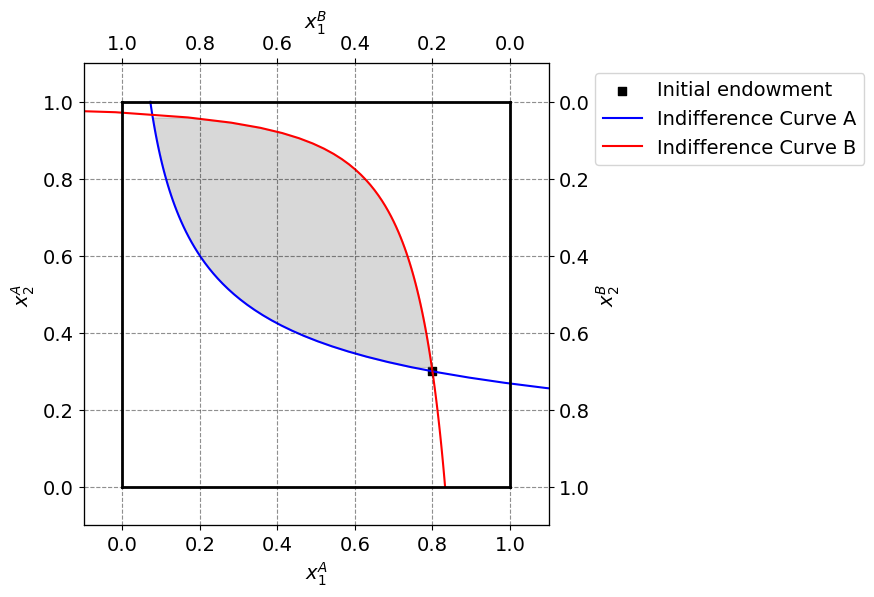

In [4]:
model.plot_edgeworth_box()

The grey shaded area in the above graph illustrates the pareto improvements relative to the given endowment. In this area we are able to make both consumers at least as good of as they are at the given endowment.

### 3.2. <a id='toc3_2_'></a>[Question 2 - Market clearing error](#toc0_)

Calculating the error in the market clearing condition for p1 in the set P1. 
First we define the range P1 and set N=75 after which we call a function, which we have defined in the py-file, that calculates the market errors. It does so by iterating over each p1 value in P1. We do that now:

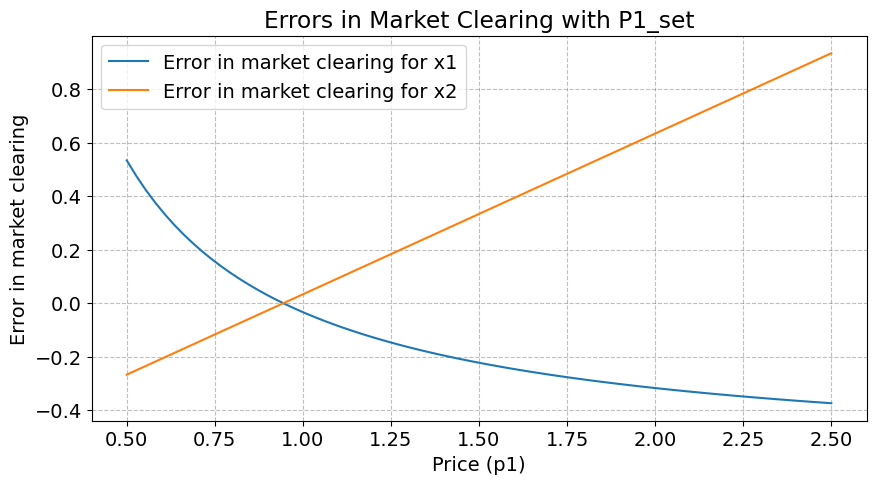

In [5]:
# Generate P1_set
P1_set = model.generate_set_P1(0.5, 2.5, 75)

# Plotting the market clearing function
model.plot_market_clearing_errors(P1_set)

The figure shows, that the market clearing price is somewhere around p1=0.9, as it is where both errors are closest to zero. In Q3 we calculate the market clearing price.

### 3.3. <a id='toc3_3_'></a>[Question 3 - Market clearing price](#toc0_)

To find the market clearing prices, we use the solver: *minimize_scalar function*. We then use the result to calculate the optimal prices for good 1.

In [6]:
# Finding the market clearing price
p_star = model.find_market_clearing_price()
print(f"The market clearing price is p1 = {p_star}")

# Finding the corresponding allocations
print(f"The alloaction for consumer A is: (x1A, x2A) = {model.demand_A(p_star)}")
print(f"The alloaction for consumer B is: (x1B, x2B) = {model.demand_B(p_star)}")

The market clearing price is p1 = 0.944443491742412
The alloaction for consumer A is: (x1A, x2A) = (0.3725491264160681, 0.7037031955959533)
The alloaction for consumer B is: (x1B, x2B) = (0.6274514788305394, 0.29629623278282746)


### 3.4a. <a id='toc3_4_'></a>[Question 4a - Allocation when p1 is in P1](#toc0_)

Because we defined the set P1 in question 2, we can reuse it for this question. We find the allocation and optimal price for consumer A given only prices in the set P1 can be chosen. We use a grid search to maximize consumer A's utility that can be described as follows:
1. For each price in P1 we calculate the demand for consumer B (since consumer B's demand depends on the price)
2. Given consumer B's demand, we calculate the remaining goods available for consumer A (since consumer A's allocation is whatever is left after B's consumption)
3. We calculate consumer A's utility for each price in using her utility function.
4. We save the price resulting in the highest possible utility for consumer A

In [7]:
# Find the price that maximizes consumer A's utility and the corresponding allocations
optimal_price, allocation_A, allocation_B = model.max_utility_A(P1_set)

# Print the optimal price and allocations
print(f"The optimal price for consumer A is: p1 = {optimal_price}")
print(f"Allocation for consumer A: x1A = {allocation_A[0]}, x2A = {allocation_A[1]}")
print(f"Allocation for consumer B: x1B = {allocation_B[0]}, x2B = {allocation_B[1]}")

The optimal price for consumer A is: p1 = 1.8866666666666667
Allocation for consumer A: x1A = 0.619316843345112, x2A = 0.6408888888888888
Allocation for consumer B: x1B = 0.380683156654888, x2B = 0.3591111111111111


### 3.4b. <a id='toc3_5_'></a>[Question 4b - Allocation when p1 > 0](#toc0_)

We impose a similar approach as in question *4a*, but we modify it to search across a continuous range of prices. This implies using an optimization solver that does not depend on a predefined set of prices. Hence, we use a *scipy optimizer function* called *minimize*. Apart from that, the approach is very much similar to *4a*.

In [8]:
optimal_price_continuous, allocation_A_continuous, allocation_B_continuous = model.max_utility_A_continuous()
print(f"The Optimal price for consumer A is: p1 = {optimal_price_continuous}")
print(f"Allocation for consumer A: {allocation_A_continuous}")
print(f"Allocation for consumer B: {allocation_B_continuous}")

The Optimal price for consumer A is: p1 = 1.899286963807993
Allocation for consumer A: (0.6209604223974916, 0.6400475357461338)
Allocation for consumer B: (0.37903957760250834, 0.3599524642538662)


### 3.5a. <a id='toc3_6_'></a>[Question 5a - allocation if choice set is in C](#toc0_)

To find the allocation if the choice set is restricted to C. We use a form of grid search:
1. **Identify Utility at Initial Endowment:** by calculating the utility levels
2. Generate **a discrete grid of allocations** feasible for A
3. We **find the Pareto improvements** from this discrete grid of allocation
4. We select the allocation with **highest possible utility for A**

In [9]:
optimal_allocation_A, optimal_utility_A, optimal_utility_B, utility_A_initial, utility_B_initial = model.pareto_optimal_allocations()

print(f"Initial utility for A: {utility_A_initial}")
print(f"Initial utility for B: {utility_B_initial}")
print(f"Optimal allocation for A: x1A = {optimal_allocation_A[0]}, x2A = {optimal_allocation_A[1]}")
print(f"Optimal utility for A: {optimal_utility_A}")
print(f"Optimal utility for B: {optimal_utility_B}")

Initial utility for A: 0.41601676461038084
Initial utility for B: 0.30365889718756617
Optimal allocation for A: x1A = 0.56, x2A = 0.8533333333333334
Optimal utility for A: 0.7415523509091093
Optimal utility for B: 0.30507896071427915


We notice the utility of consumer B to be almost identical to in the initial endowment, thus not violating the pareto restrictions. However, consumer A has re-allocated the goods such that her utility has almost doubled.

### 3.5b. <a id='toc3_7_'></b>[Question 5b - allocation if no further restrictions](#toc0_)

To find the allocation with no further restrictions imposed and with A as the market maker we use an *optimization solver* and frame the problem as a constrained optimization problem ensuring that consumer B is not worse off than in the initial endowment. The method outlined:
1. We define an **objective function** maximizing the utility of consumer A.
2. We define the **constraints** ensuring Pareto optimality and define a set of **bounds** to ensure the allocation does not exceed what is available
3. We **call the solver** and print the results

In [10]:
#Do the actual allocation calculation
optimal_allocation_A_5b, optimal_utility_A_5b, optimal_utility_B_5b, utility_A_initial_5b, utility_B_initial_5b = model.pareto_optimal_allocations_5b()

#Print the results
print(f"Initial utility for A: {utility_A_initial_5b}")
print(f"Initial utility for B: {utility_B_initial_5b}")
print(f"Optimal allocation for A: x1A = {optimal_allocation_A_5b[0]}, x2A = {optimal_allocation_A_5b[1]}")
print(f"Optimal utility for A: {optimal_utility_A_5b}")
print(f"Optimal utility for B: {optimal_utility_B_5b}")

Initial utility for A: 0.41601676461038084
Initial utility for B: 0.30365889718756617
Optimal allocation for A: x1A = 0.5757450571871308, x2A = 0.8444377880991675
Optimal utility for A: 0.7432276287140577
Optimal utility for B: 0.3036588738576721


We notice the result to be very much similar to *5a*. However, consumer A is not restricted by the same discrete grid of allocations feasible for A to choose from. Hence, she can choose from a contiounous set of allocation allowing for a slightly higher utility.

### 3.6a. <a id='toc3_8_'></a>[Question 6a - Social planner](#toc0_)

We use the function in the py-file: utilitarian_allocation to calculate the allocation of goods when the social planner is the market maker. We impose bounds on the decision variables to ensure that the allocations are between 0 and 1. We then print the results. (Note: SP = social planner)

In [11]:
optimal_allocation_A_SP, optimal_allocation_B_SP, max_utility_aggregate_SP = model.utilitarian_allocation()
print("Optimal Allocation for A:", optimal_allocation_A_SP)
print("Optimal Allocation for B:", optimal_allocation_B_SP)
print("Maximum Aggregate Utility:", max_utility_aggregate_SP)

Optimal Allocation for A: [0.33333337 0.66666663]
Optimal Allocation for B: (0.6666666340306149, 0.3333333739359233)
Maximum Aggregate Utility: 1.0582673679787966


The allocation now corresponds to the alpha and beta values, which makes sence. The social planner will always try to maximize the aggregate utility.

### 3.6b. <a id='toc3_9_'></a>[Question 6b - Illustration of allocations](#toc0_)

We reuse the code from question 1 in order to illustrate our results from question 3)-5). We add it using our *comparison_data* feature.

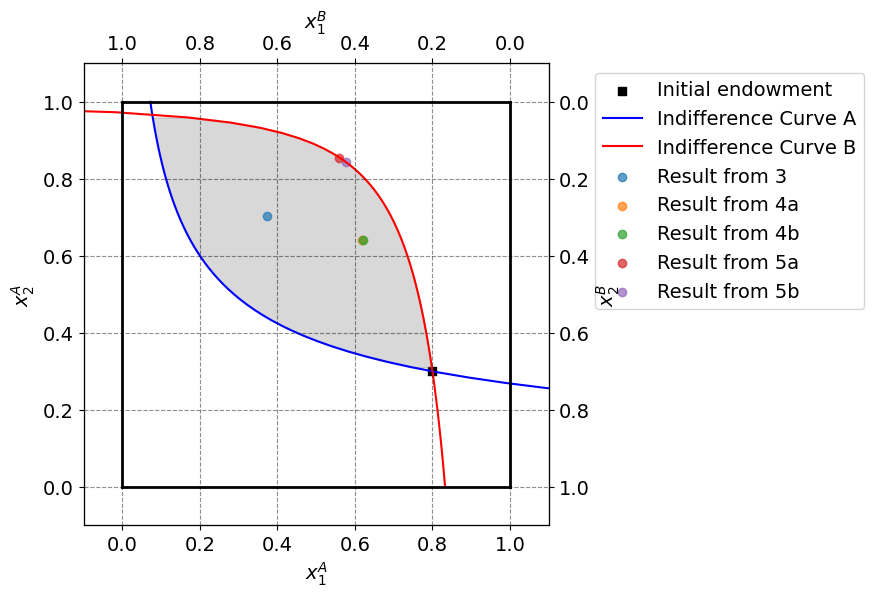

In [12]:
comparison_data = {
    'Result from 3': model.demand_A(p_star),
    'Result from 4a': allocation_A,
    'Result from 4b': allocation_A_continuous,
    'Result from 5a': optimal_allocation_A,
    'Result from 5b': optimal_allocation_A_5b,
}
model.plot_edgeworth_box(comparison_data=comparison_data)

We observe that all the points are either inside or on the border of the grey shaded cigar, illustrating the pareto improvements relative to the initial endowment. That is a strong argument in favour of our calculations being correct. (point 4a and 4b are on top of each other)

Generally, we can conclude that the closer we are to the top right corner, the more utility consumer A will have and the less consumer B has. Vice versa, when we approach the bottom left corner. It is due to the fact that approaching the top right corner, consumer A will have more of both goods and consumer B will have less. 
Hence, we can conclude that consumer A will prefer the results from question 5a and 5b, where consumer A almost freely can choose the allocations only restricted by a few constraints. On the other hand, consumer B will not prefer this allocation. The allocations from question 3, 4a and 4b will result in more equal distributions. However, still in favour of consumer A as we are relatively closer to the top right corner.

### 3.7. <a id='toc3_10_'></a>[Question 7 - Random set of 50 elements](#toc0_)

We consider the set and draw 50 random points from the seed number 123. We display the numbers in a plot.

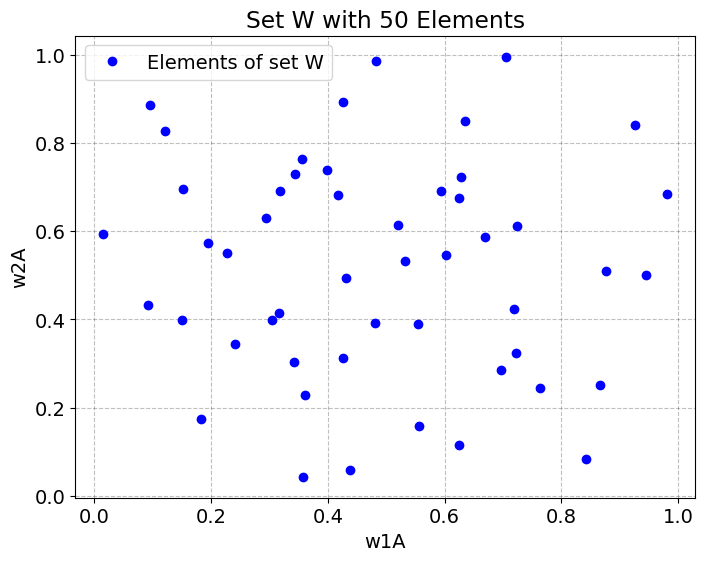

In [13]:
model.plot_random_set_W(num_elements=50, seed=123)

### 3.8. <a id='toc3_11_'></a>[Question 8 - PLotting allocation in an Edgeworth Box](#toc0_)

To find the market equilibrium allocation for each $\omega^A\in W$ we create to empty lists for the two coordinates and iterate over the set of $\omega^A$. While iterating over the set we reuse the code for market equilibria from earlier.

In [ ]:
# Create lists to store market equilibrium allocations
x1A_list = []
x2A_list = []

# Iterate over different values of par.w1a and par.w2a
for w1a, w2a in W:
    # Set endowment levels for agent A
    model.par.w1A = w1a
    model.par.w2A = w2a

    # Define the range of prices
    N = 75
    P1 = [1 * 10**-8 + 2 * i / N for i in range(N + 1)]  # 1*10**-8 is added to avoid division by zero

    # Calculate market clearing errors
    errors = model.calculate_market_clearing_errors(P1)

    # Find market clearing price
    market_clearing_price, min_error = model.find_market_clearing_price(P1)
    x1A_market_eq = model.demand_A(market_clearing_price)
    x1B_market_eq = model.demand_B(market_clearing_price)

    # Append the market equilibrium allocation to lists
    x1A_list.append(x1A_market_eq)
    x2A_list.append(x1B_market_eq)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x1A_list, x2A_list, label='Agent A', color='blue')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

We note that all the market equilibrium allocation are located along the budget line, also depicted in the graph from question 1. 

### 4. <a id='toc3_11_'></a>[Sources](#toc0_)

We have generally found help and inspiration from ChatGPT and general desktop research for most of the questions. Furthermore, the following source has been used for question 1 as also noted there:  
  author = Maxim Litvak  
  title = pyEdgeworthBox: A Python Library for Edgeworth Box Plots  
  year = 2024 (Year of the version or first release)  
  version = 0.3.3  
  url = https://github.com/maxlit/pyEdgeworthBox  